In [ ]:
DATA SCIENCE PROJECT -PREDICTING INSURANCE COSTS

Name: Biji Karthika
Roll no: AA.SC.P2MCA2307421

In [ ]:
Topic:Predicting insurance costs
 
This dataset contains information on individual medical insurance bills. 
Each bill is associated with some demographic and personal characteristics of the person who received it.

Predict patient medical insurance costs using linear regression. 
Working with a dataset containing features such as age, BMI, number of children, smoking status, and region,
will develop a model to estimate insurance charges. 
will explore the relationships between these factors and insurance costs, handle categorical variables, and interpret the model's
coefficients to understand the impact of each feature. 
This project will strengthen your skills in regression analysis, feature engineering, and deriving actionable
insights in the healthcare insurance domain


In [ ]:
Step-by-Step Instructions:-

1. Load and explore the insurance cost dataset.
2. Perform data preprocessing, including handling categorical variables.
3. Conduct exploratory data analysis to visualize relationships between features and insurance costs.
4. Create training/testing sets to build and train a linear regression model using Scikit-learn.
5. Make predictions on the test set and evaluate the model's performance.
6. Visualize the actual vs. predicted values and residuals.


In [ ]:
Expected Outcomes:

Upon completing this project, we will have gained valuable skills and experience, including:

1. Implementing end-to-end linear regression analysis for cost prediction
2. Handling categorical variables in regression models
3. Interpreting regression coefficients to derive business insights
4. Evaluating model performance and understanding its limitations in healthcare cost prediction


In [21]:
# import libraries to be added to do the project

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
#load dataset
insurance = pd.read_csv("/Users/karthikabiji/Documents/insurance.csv")

In [48]:
df.shape


(1338, 7)

In [49]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
EXPLORING THE DATASET

In [27]:
# Columns in the dataset
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

array([[<Axes: title={'center': 'charges'}>]], dtype=object)

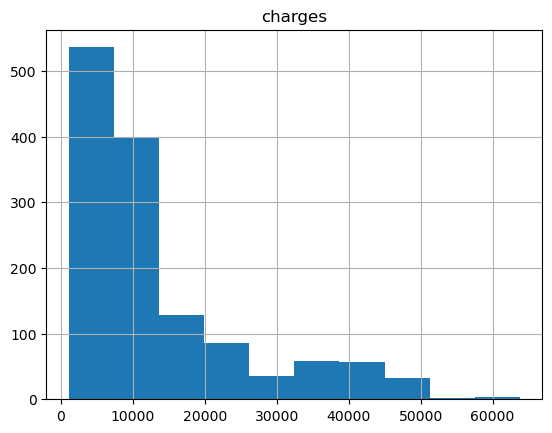

In [28]:
insurance.hist("charges")


In [ ]:
The charges column is highly skewed to the right.
Extremely costly insurance charges are more common than extremely small ones. 
This makes it unlikely that the errors in the model will truly be centered at zero. 
It might be worth it to log-transform the outcome.



array([[<Axes: title={'center': 'log_charges'}>]], dtype=object)

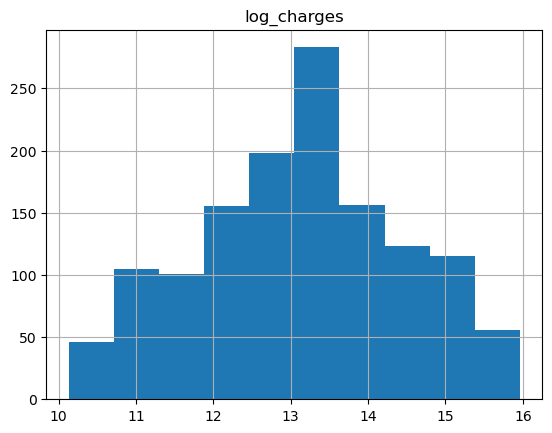

In [29]:
insurance["log_charges"] = np.log2(insurance["charges"])

insurance.hist("log_charges")
     


In [ ]:
The log-transformed charges values are more centered, which is what we wanted.
This makes it more likely that the errors will be unbiased.

In [31]:
# Select only numeric columns
numeric_columns = insurance.select_dtypes(include=['number'])

# Compute the correlation
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)


                  age       bmi  children   charges  log_charges
age          1.000000  0.109272  0.042469  0.299008     0.527834
bmi          0.109272  1.000000  0.012759  0.198341     0.132669
children     0.042469  0.012759  1.000000  0.067998     0.161336
charges      0.299008  0.198341  0.067998  1.000000     0.892964
log_charges  0.527834  0.132669  0.161336  0.892964     1.000000


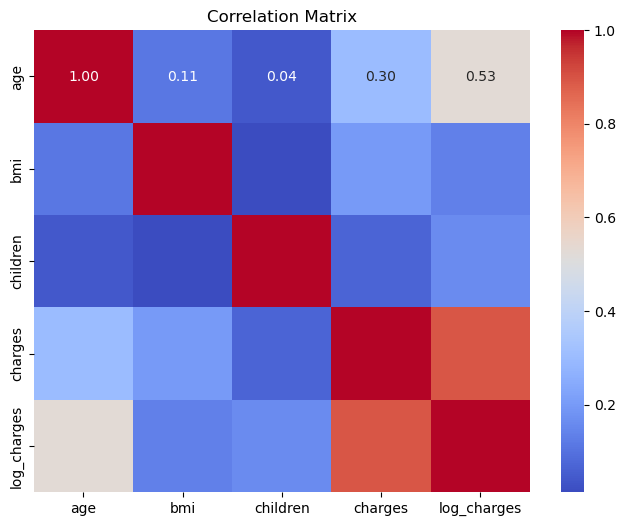

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
age has 30% correlation with charges, bmi has 19.8% correlation, and number of children has 6.7% correlation.


<Axes: title={'center': 'log_charges'}, xlabel='sex'>

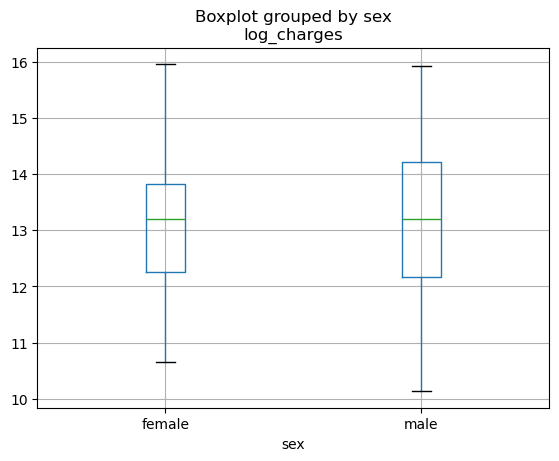

In [34]:
insurance.boxplot(column = ["log_charges"], by = "sex")


<Axes: title={'center': 'log_charges'}, xlabel='smoker'>

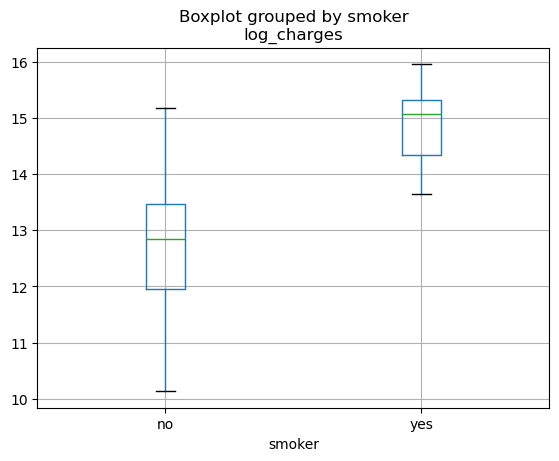

In [35]:
insurance.boxplot(column = ["log_charges"], by = "smoker")


<Axes: title={'center': 'log_charges'}, xlabel='region'>

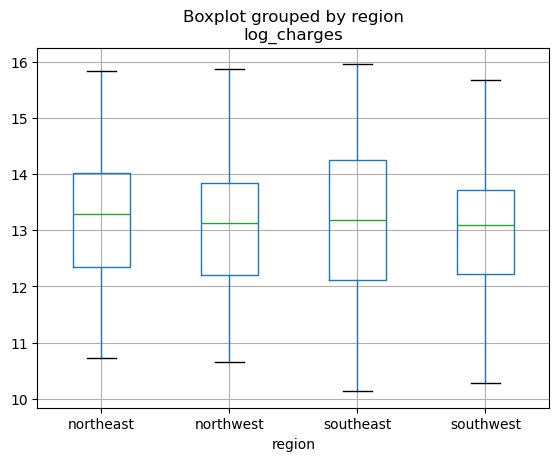

In [36]:
insurance.boxplot(column = ["log_charges"], by = "region")


<Axes: title={'center': 'log_charges'}, xlabel='region'>

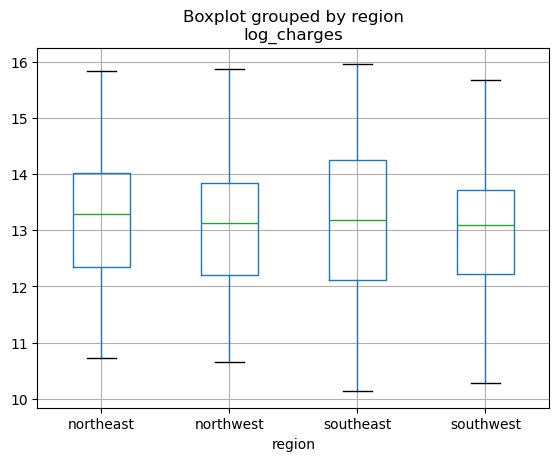

In [37]:
insurance.boxplot(column = ["log_charges"], by = "region")


In [ ]:
Males seem to have a wider distribution of charges compared to women. 
Smokers have much higher costs than non-smokers. 
There don't seem to be many appreciable differences between regions.

In [ ]:
Dividing The Data
Based on the univariate relationships shown above, age, bmi and smoker are positively associated with higher charges

In [38]:
# Splitting the data up into a training and test set
insurance["is_smoker"] = (insurance["smoker"] == "yes")
X = insurance[["age", "bmi", "is_smoker"]]
y = insurance["log_charges"]

# 75% for training set, 25% for test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 1)
     

In [39]:
# Training and checking model performance on training set
insurance_model = LinearRegression()
insurance_model.fit(X_train, y_train)
     


LinearRegression()

In [40]:
# Get predicted values by model
y_pred = insurance_model.predict(X_train)

# MSE on the log scale for the insurance charges
mean_squared_error(y_train, y_pred)
     


0.4546665339270644

In [41]:
# MSE on the original scale for the insurance charges
np.exp(mean_squared_error(y_train, y_pred))
     


1.575647870310887

In [42]:

# Coefficient of determination
r2_score(y_train, y_pred)

0.7421118855283421

In [ ]:
The training MSE for the model is 0.454 and is 1.57 on the original scale. 
The indicates that the model can explain 74% of the variation in the log-insurance charges. 
These preliminary results are promising, but we must remember that these are optimistic values.

<Axes: xlabel='fitted', ylabel='residuals'>

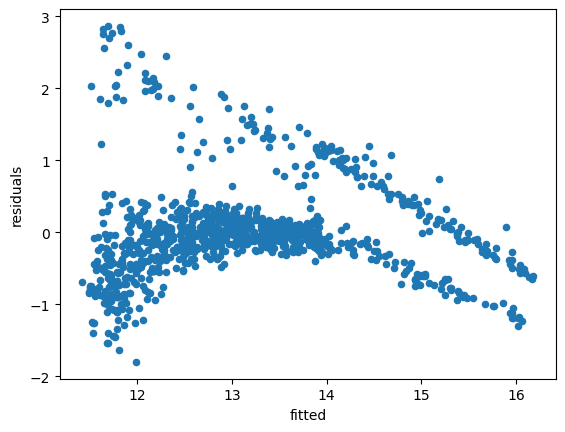

In [43]:
# Quick visual check of residuals
check = pd.DataFrame()
check["residuals"] = y_train - y_pred
check["fitted"] = y_pred

check.plot.scatter(x = "fitted", y = "residuals")
     

In [ ]:
The residuals suggest some violations to the assumptions of linear regression. 
As fitted values get larger, the residuals trend downward. We expect an even band, centered around zero.
This does not necessarily make the model predictions unusable, but it puts into question the linear regression assumptions.


In [44]:

# Getting the non-intercept coefficients
insurance_model.coef_

array([0.04892865, 0.01523672, 2.23063344])

In [ ]:
A year increase in the subject is associated with a 0.04 increase in the log charges, holding smoking status and bmi constant.
About a 4% increase in the charges on the regular scale.

A unit increase in the subject BMI is associated with a 0.01 increase in the log charges, holding smoking status and age constant.
About a 1.5% increase in the charges on the regular scale.

A smoker is associated with a 2.23 increase in the log charges, holding age and bmi constant. 
About a 930% increase in the charges on the regular scale.


In [45]:
#Getting MSE on test model
test_pred = insurance_model.predict(X_test)

mean_squared_error(y_test, test_pred)

0.4355350875308206

In [46]:
# Putting the outcome (in log-terms) back into the original scale
np.exp(mean_squared_error(y_test, test_pred))
     


1.5457899706350973

In [ ]:
DRAWING CONCLUSIONS

The test MSE was about 0.435, while the training MSE was about 0.454. 
In this case, the two errors match up pretty well, so we can conclude that the model is not overfit.
The residuals suggest that the model is predicting much lower costs for subjects who were actually charged much higher.
Therefore the model struggles with these higher costs. As a whole, the model predictions are too conservative.